In [12]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [13]:
def eggholder(x):
    return (
        (-x[1] + 47) * np.sin(np.sqrt(abs(x[0] / 2 + x[1] + 47)))
        - x[0] * np.sin(np.sqrt(abs(x[0] - x[1] - 47)))
    )

In [14]:
x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

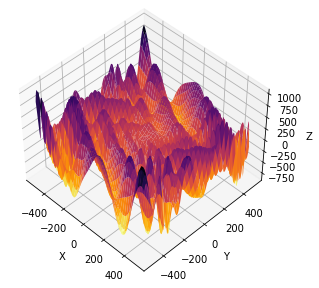

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
p = ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='inferno_r')
# plt.colorbar(p)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.tight_layout()
plt.savefig('eggholder.pdf')

In [16]:
bounds = (400, 500), (400, 500)
constr = {
    'type': 'eq',
    'fun': lambda x: x[0] - x[1]
}

In [17]:
res = opt.minimize(
    eggholder,
    x0=(450, 450),
    bounds=bounds,
    constraints=constr,
    method='SLSQP'
)
print(res)

     fun: -641.3734202306166
     jac: array([ 27.49101257, -27.49103546])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([448.93802864, 448.93802864])


In [20]:
res = opt.shgo(
    eggholder,
    bounds=bounds,
    constraints=constr
)
print(res)

     fun: -641.1947007740115
    funl: array([-641.19470077])
 message: 'Optimization terminated successfully.'
    nfev: 11
     nit: 2
   nlfev: 6
   nlhev: 0
   nljev: 2
 success: True
       x: array([450., 450.])
      xl: array([[450., 450.]])
